# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Meidina Tantri
- **Email:** meidin.a1922@gmail.com
- **ID Dicoding:** meidina_tantri__VLy0

## Menentukan Pertanyaan Bisnis

- Perbedaan pola penggunaan sepeda antara holiday dan non-holiday?
- Bagaimana pengaruh bulan pada tingkat peminjaman sepeda?
- Dimana waktu paling sering dilakukan peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [74]:
day = pd.read_csv("https://raw.githubusercontent.com/SweetieblueberryDart/bikesharing/main/day.csv")
hour = pd.read_csv("https://raw.githubusercontent.com/SweetieblueberryDart/bikesharing/main/hour.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [76]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [77]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [78]:
print ("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [79]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [80]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [81]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
print ("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [83]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [84]:
day.duplicated().sum()

0

In [85]:
day.drop_duplicates(inplace=True)

In [86]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [87]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [88]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [89]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [90]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [91]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [92]:
day["dteday"] = pd.to_datetime(day["dteday"])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [93]:
hour["dteday"] = pd.to_datetime(hour["dteday"])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [94]:
day.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "temp": "temperature",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)
day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
hour.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "temp": "temperature",
    "hum": "humidity",
    "cnt": "count",
    "hr": "hour"
}, inplace=True)
hour.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [96]:
day.sample(10)

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
583,584,2012-08-06,3,1,8,0,1,1,2,0.752500,0.710246,0.654167,0.129354,1233,5780,7013
560,561,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969
401,402,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
12,13,2011-01-13,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406
107,108,2011-04-18,2,0,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429
191,192,2011-07-11,3,0,7,0,1,1,1,0.762500,0.729804,0.635833,0.282337,723,3363,4086
462,463,2012-04-07,2,1,4,0,6,0,1,0.437500,0.426129,0.254167,0.274871,3252,3605,6857
244,245,2011-09-02,3,0,9,0,5,1,2,0.643333,0.604808,0.727083,0.139929,875,3852,4727
711,712,2012-12-12,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937,310,5009,5319


In [97]:
day.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [98]:
day.instant.is_unique

True

In [99]:
monthly_counts = day.groupby('month')['count'].sum()
print(monthly_counts)

month
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: count, dtype: int64


In [100]:
holiday_df = hour[hour['holiday'] == 1].groupby('hour')['count'].sum()

print(holiday_df)


hour
0     1207
1      817
2      535
3      209
4      117
5      223
6      594
7     1725
8     3581
9     3595
10    4273
11    5219
12    6030
13    6269
14    6012
15    5568
16    5718
17    6156
18    5644
19    4657
20    3737
21    3047
22    2286
23    1216
Name: count, dtype: int64


In [101]:
non_holiday_df = hour[hour['holiday'] == 0].groupby('hour')['count'].sum()

print(non_holiday_df)


hour
0      37923
1      23347
2      15817
3       7965
4       4311
5      14038
6      54538
7     152446
8     257420
9     155843
10    121984
11    146101
12    178384
13    178650
14    169640
15    177581
16    222030
17    330704
18    304128
19    222132
20    160813
21    122398
22     93326
23     62725
Name: count, dtype: int64


In [102]:
hourly_counts=hour.groupby('hour')['count'].sum()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perbedaan pola penggunaan sepeda antara holiday dan non-holiday?

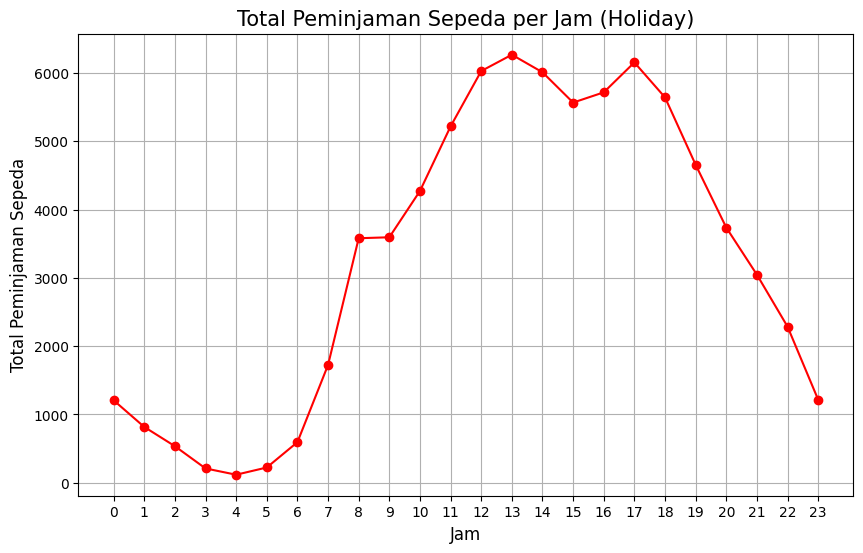

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(holiday_df.index, holiday_df.values, marker='o', color='red')
plt.title('Total Peminjaman Sepeda per Jam (Holiday)', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.grid(True)
plt.show()

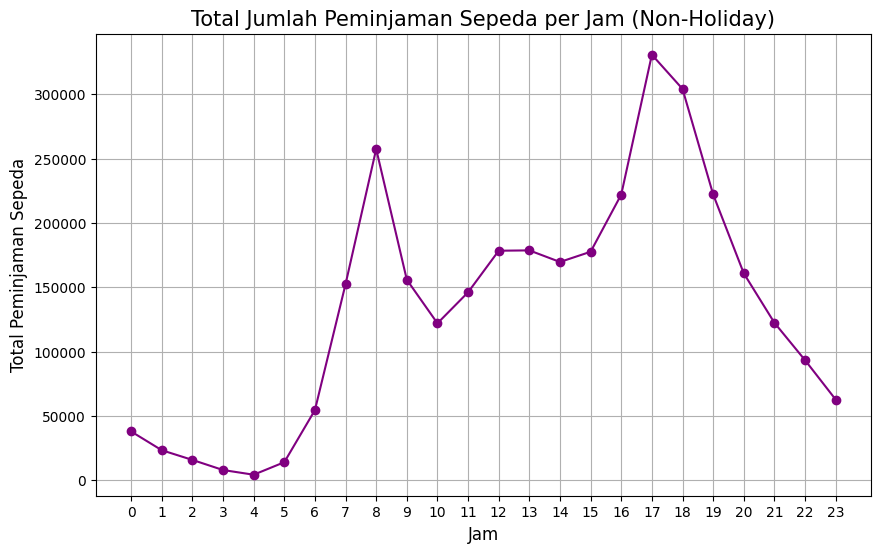

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(non_holiday_df.index, non_holiday_df.values, marker='o', color='purple')
plt.title('Total Jumlah Peminjaman Sepeda per Jam (Non-Holiday)', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.grid(True)
plt.show()


### Pertanyaan 2: Bagaimana pengaruh bulan pada tingkat peminjaman sepeda?

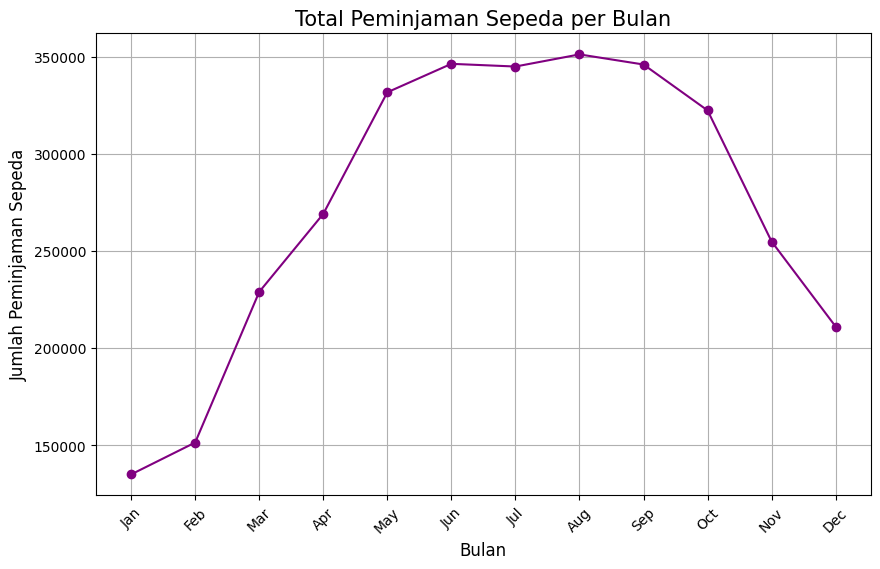

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='purple')
plt.title('Total Peminjaman Sepeda per Bulan', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 3: Dimana waktu paling sering dilakukan peminjaman sepeda?


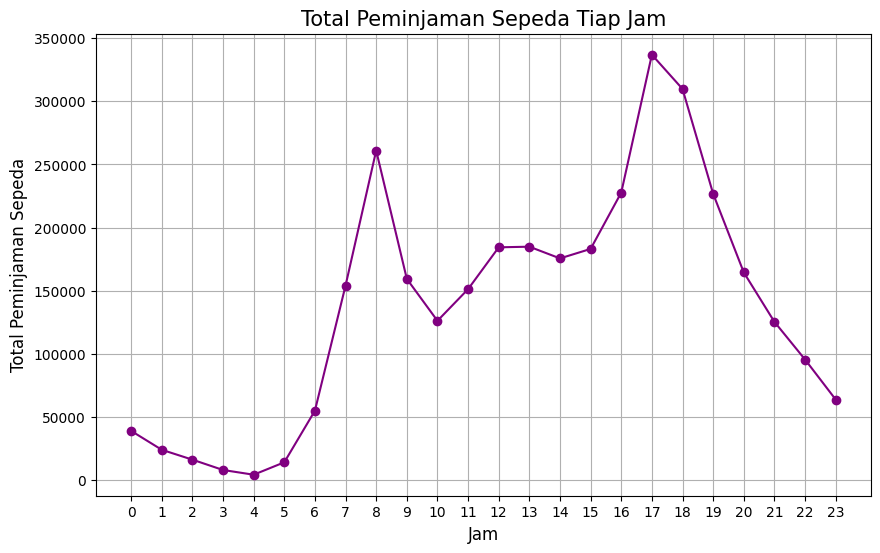

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='purple')
plt.title('Total Peminjaman Sepeda Tiap Jam', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda', fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Dari analisa yang telah dilakukan diperoleh bahwa pada saat holiday peminjaman sepeda paling banyak terjadi di jam 13 dan jam 17. Hal ini mengindikasikan bahwa adanya peningkatan peminjaman sepeda pada jam 9 keatas dan puncaknya terjadi pada jam 13. Pada saat non-holiday peminjaman sepeda mengalami peningkatan hingga jam 8 dan terus meningkat hingga puncaknya pada jam 17.

- Conclution pertanyaan 2 : Dari data yang diperoleh, setelah dianalisa didapatkan bahwa jumlah peminjaman sepeda perbulan terus mengalami peningkatan dari bulan Januari hingga bulan Juni dan mengalami sedikit penurunan di bulan Juli namun disusul dengan peningkatan kembali di bulan Agustus sebagai puncak peminjaman sepeda.

- Conclution pertanyaan 3 : Dari data yang diperoleh dapat dilihat bahwa jam memengaruhi total peminjaman sepeda, dimana kenaikan terjadi hingga pukul 8 dan meski mengalami penurunan, data tetap mengalami peningkatan hingga puncaknya pada jam 17.
